In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [138]:
file_path = 'C:/Users/user/Desktop/clustering_shill/Shill Bidding Dataset.csv'
shill_bidding = pd.read_csv(file_path)
shill_bidding.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [139]:
shill_bidding

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [140]:
shill_bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [141]:
print(shill_bidding.describe())

          Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
count   6321.000000  6321.000000      6321.000000    6321.000000   
mean    7535.829457  1241.388230         0.142541       0.127670   
std     4364.759137   735.770789         0.197084       0.131530   
min        1.000000     5.000000         0.000000       0.011765   
25%     3778.000000   589.000000         0.027027       0.043478   
50%     7591.000000  1246.000000         0.062500       0.083333   
75%    11277.000000  1867.000000         0.166667       0.166667   
max    15144.000000  2538.000000         1.000000       1.000000   

       Successive_Outbidding  Last_Bidding  Auction_Bids  \
count            6321.000000   6321.000000   6321.000000   
mean                0.103781      0.463119      0.231606   
std                 0.279698      0.380097      0.255252   
min                 0.000000      0.000000      0.000000   
25%                 0.000000      0.047928      0.000000   
50%                 0.00000

# EDA

In [142]:
# Checking for missing values
shill_bidding.isnull().sum()


Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [143]:
shill_bidding.drop(columns=['Bidder_ID'], inplace=True)

In [144]:
print(shill_bidding_.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bidder_Tendency         6321 non-null   float64
 1   Bidding_Ratio           6321 non-null   float64
 2   Successive_Outbidding   6321 non-null   float64
 3   Last_Bidding            6321 non-null   float64
 4   Auction_Bids            6321 non-null   float64
 5   Starting_Price_Average  6321 non-null   float64
 6   Early_Bidding           6321 non-null   float64
 7   Winning_Ratio           6321 non-null   float64
 8   Auction_Duration        6321 non-null   int64  
 9   Class                   6321 non-null   int64  
 10  KMeans_Cluster          6321 non-null   int32  
dtypes: float64(8), int32(1), int64(2)
memory usage: 518.6 KB
None


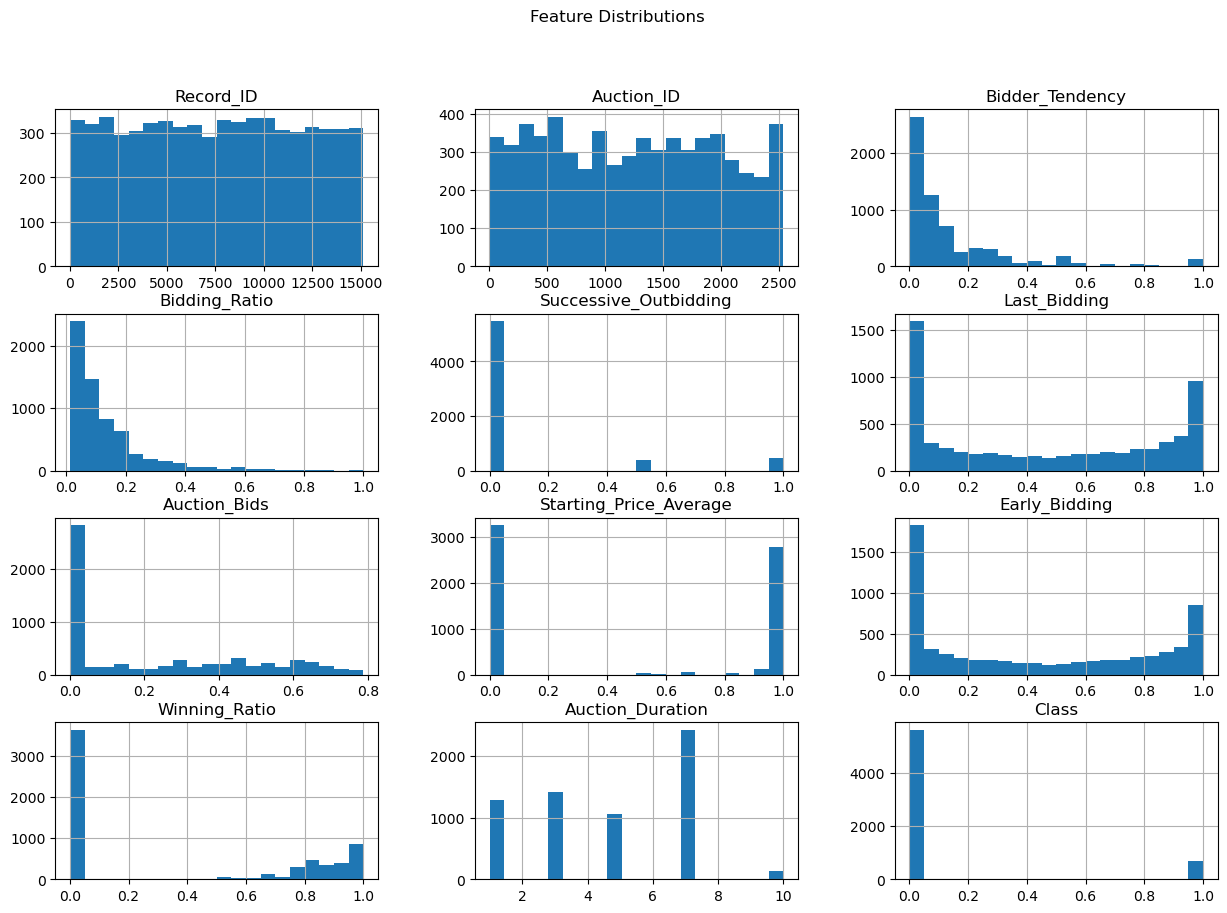

In [145]:
# Plotting histograms for the data features
shill_bidding.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.savefig('C:/Users/user/Desktop/Clustering Salford/histogram distribution.png')
plt.show()


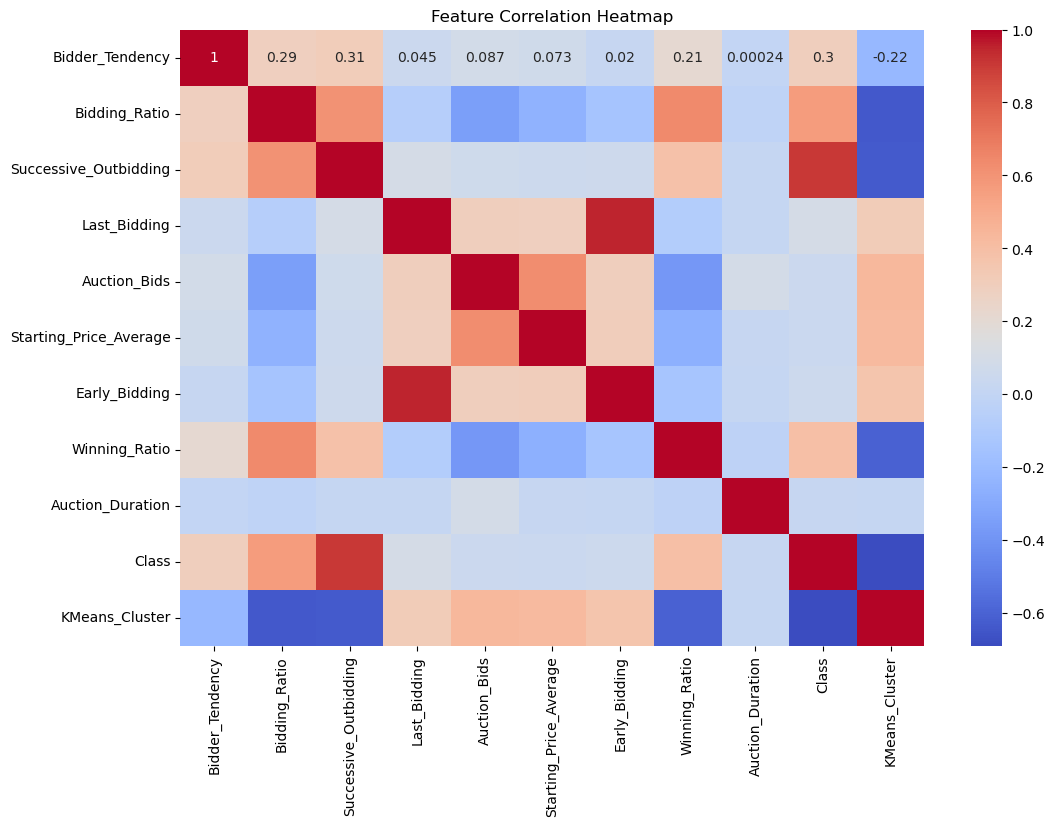

In [146]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(shill_bidding_.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig('correlations.png')
plt.show()


# Data Processing

In [147]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shill_bidding.select_dtypes(include='number'))


# PCA for Visualization

In [148]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


# K-Means Clustering

In [149]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
shill_bidding['KMeans_Cluster'] = kmeans_labels


In [150]:
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(kmeans_silhouette)

0.2086762908693639


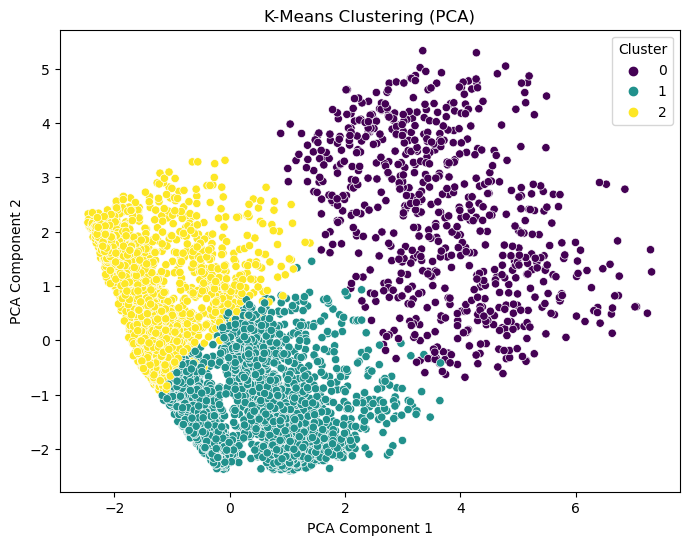

In [151]:
# Visualization of K-Means Clusters in PCA Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('C:/Users/user/Desktop/Clustering Salford/kmeans.png')
plt.show()

# DBSCAN Clustering

In [152]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
shill_bidding['DBSCAN_Cluster'] = dbscan_labels


In [153]:
non_noise_mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(scaled_data[non_noise_mask], dbscan_labels[non_noise_mask])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: 0.5028500212136684


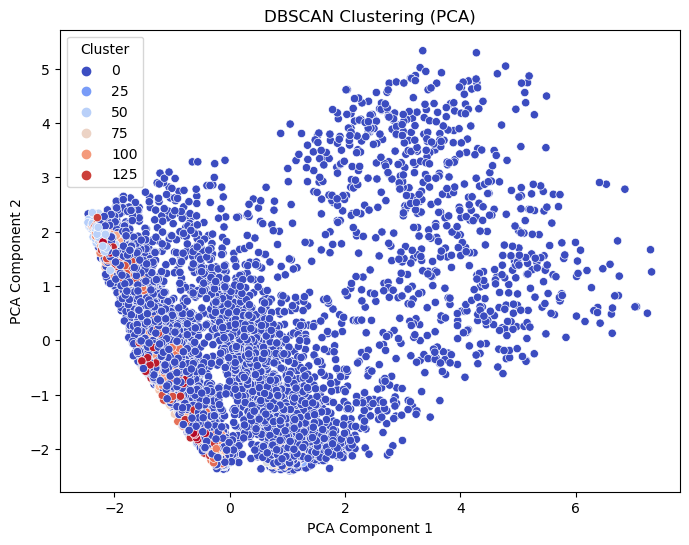

In [154]:
# Visualization of DBSCAN Clusters in PCA Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dbscan_labels, palette='coolwarm')
plt.title("DBSCAN Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('C:/Users/user/Desktop/Clustering Salford/dbscan.png')
plt.show()


# Visualizing Centroids (for K-Means)

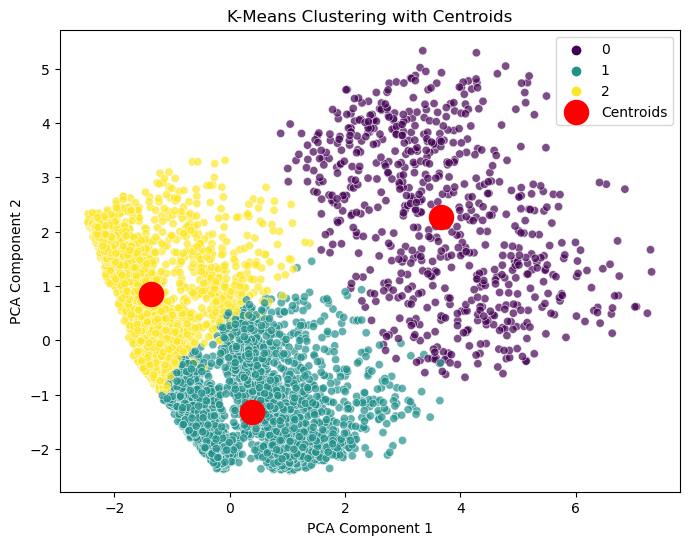

In [155]:
centroids = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.savefig('C:/Users/user/Desktop/Clustering Salford/kmeans centroid.png')
plt.show()

# Visualizing Centroids (for DBSCAN)

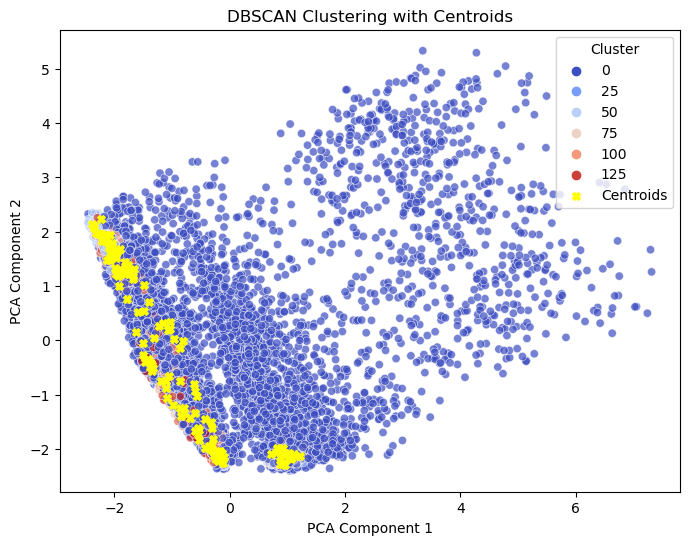

In [156]:
# Step 1: Calculate Centroids in PCA Space
# Exclude noise points (-1) from centroid calculation
dbscan_centroids_pca = (
    pd.DataFrame(pca_data[dbscan_labels != -1], columns=["PCA1", "PCA2"])
    .assign(Cluster=dbscan_labels[dbscan_labels != -1])
    .groupby("Cluster")
    .mean()
    .to_numpy()
)

# Step 2: Visualization of DBSCAN Clusters and Centroids in PCA Space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_data[:, 0], 
    y=pca_data[:, 1], 
    hue=dbscan_labels, 
    palette="coolwarm", 
    alpha=0.7
)

# Plot centroids as red "X" markers
if dbscan_centroids_pca.size > 0:
    plt.scatter(
        dbscan_centroids_pca[:, 0], 
        dbscan_centroids_pca[:, 1], 
        s=30, 
        c="yellow", 
        marker="X", 
        label="Centroids"
    )

plt.title("DBSCAN Clustering with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('C:/Users/user/Desktop/Clustering Salford/dbscan centroids.png')
plt.show()


# Final Cluster Analysis

In [157]:
kmeans_cluster_analysis = shill_bidding.groupby('KMeans_Cluster').mean()
dbscan_cluster_analysis = shill_bidding.groupby('DBSCAN_Cluster').mean()



In [158]:
print("K-Means Cluster Analysis:\n", kmeans_cluster_analysis)

K-Means Cluster Analysis:
                   Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
KMeans_Cluster                                                             
0               7482.800000  1230.824460         0.315642       0.348263   
1               7400.074709  1186.714531         0.121927       0.143068   
2               7695.721566  1303.012925         0.120327       0.054462   

                Successive_Outbidding  Last_Bidding  Auction_Bids  \
KMeans_Cluster                                                      
0                            0.828058      0.575045      0.263208   
1                            0.012337      0.237450      0.057188   
2                            0.016433      0.677563      0.411438   

                Starting_Price_Average  Early_Bidding  Winning_Ratio  \
KMeans_Cluster                                                         
0                             0.536432       0.492782       0.863657   
1                             

In [159]:
print("DBSCAN Cluster Analysis:\n", dbscan_cluster_analysis)

DBSCAN Cluster Analysis:
                    Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
DBSCAN_Cluster                                                              
-1               7443.121835  1246.272035         0.162808       0.141744   
 0               1194.500000  1165.000000         0.038668       0.028017   
 1                523.571429   582.428571         0.051532       0.041755   
 2               1707.571429  2515.571429         0.049386       0.089827   
 3                911.071429   187.214286         0.029987       0.076516   
...                      ...          ...              ...            ...   
 130            14349.400000  1297.000000         0.022903       0.032258   
 131            14445.125000  2272.375000         0.070386       0.028472   
 132            14417.250000  1064.000000         0.059018       0.057692   
 133            14621.142857  1891.000000         0.046922       0.047619   
 134            14613.000000   268.000000         